In [17]:
library(dplyr)
library(MASS)
library(class)

In [18]:
#importamos el archivo (He cambiado el nombre del archivo de csv a b2b, más fácil)
b2b<-read.csv(file="b2b.csv", head=TRUE, sep=",")
head(b2b)
tail(b2b)
names(b2b)

,ï..Reference,Order.Value,Group
,<int>,<dbl>,<int>
1,570554,0.38,1
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
6,540833,0.65,1


,ï..Reference,Order.Value,Group
,<int>,<dbl>,<int>
11781,578315,9467.23,0
11782,551698,9468.60,1
11783,556090,9471.27,0
11784,537253,9473.16,1
11785,554094,9475.20,1
11786,557888,9476.80,1


[1] "ï..Reference" "Order.Value"  "Group"

In [63]:
#Separamos las clases de ventas, sistema de recomendación 1, sin sistema de recomendación 0
b2b1<-b2b[b2b$Group==1,]
b2b0<-b2b[b2b$Group==0,]
head(b2b0)
head(b2b1)
summary(b2b0)
summary(b2b1)
total0=sum(b2b0$Order.Value)
total1=sum(b2b1$Order.Value)

,ï..Reference,Order.Value,Group
,<int>,<dbl>,<int>
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
10,540945,0.85,0
11,544438,0.85,0


,ï..Reference,Order.Value,Group
,<int>,<dbl>,<int>
1,570554,0.38,1
6,540833,0.65,1
7,560217,0.79,1
8,542136,0.84,1
9,549534,0.84,1
13,551538,0.85,1


  ï..Reference     Order.Value         Group  
 Min.   :536365   Min.   :   0.4   Min.   :0  
 1st Qu.:547524   1st Qu.: 475.2   1st Qu.:0  
 Median :558622   Median :2170.6   Median :0  
 Mean   :558874   Mean   :3024.8   Mean   :0  
 3rd Qu.:570255   3rd Qu.:5191.5   3rd Qu.:0  
 Max.   :581587   Max.   :9471.3   Max.   :0  

  ï..Reference     Order.Value          Group  
 Min.   :536366   Min.   :   0.38   Min.   :1  
 1st Qu.:547647   1st Qu.: 601.39   1st Qu.:1  
 Median :558632   Median :2526.08   Median :1  
 Mean   :558891   Mean   :3173.84   Mean   :1  
 3rd Qu.:570406   3rd Qu.:5283.07   3rd Qu.:1  
 Max.   :581583   Max.   :9476.80   Max.   :1  

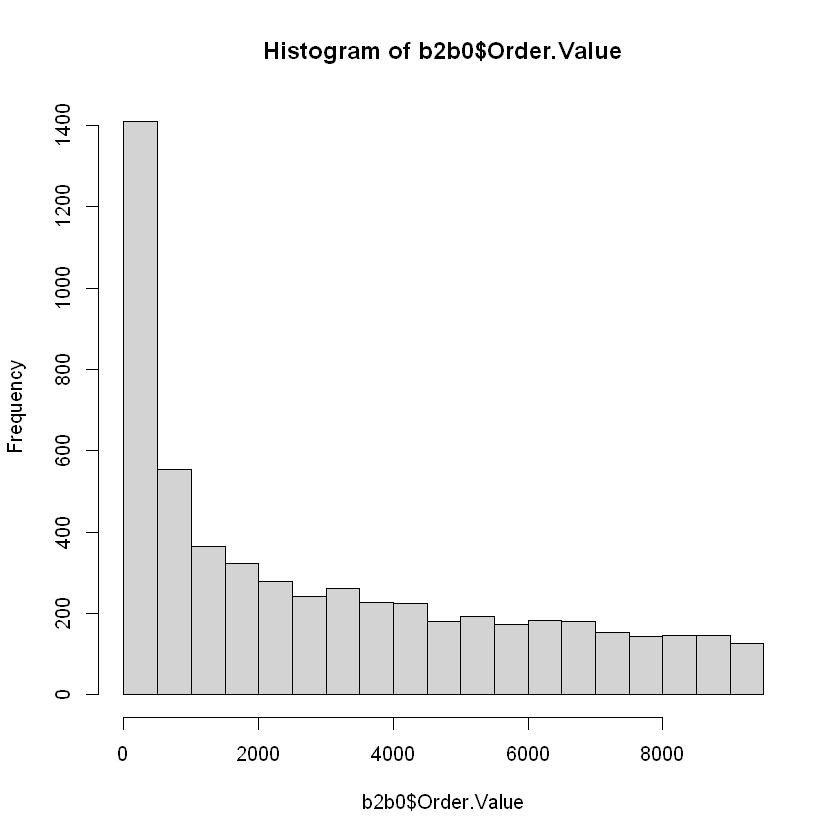

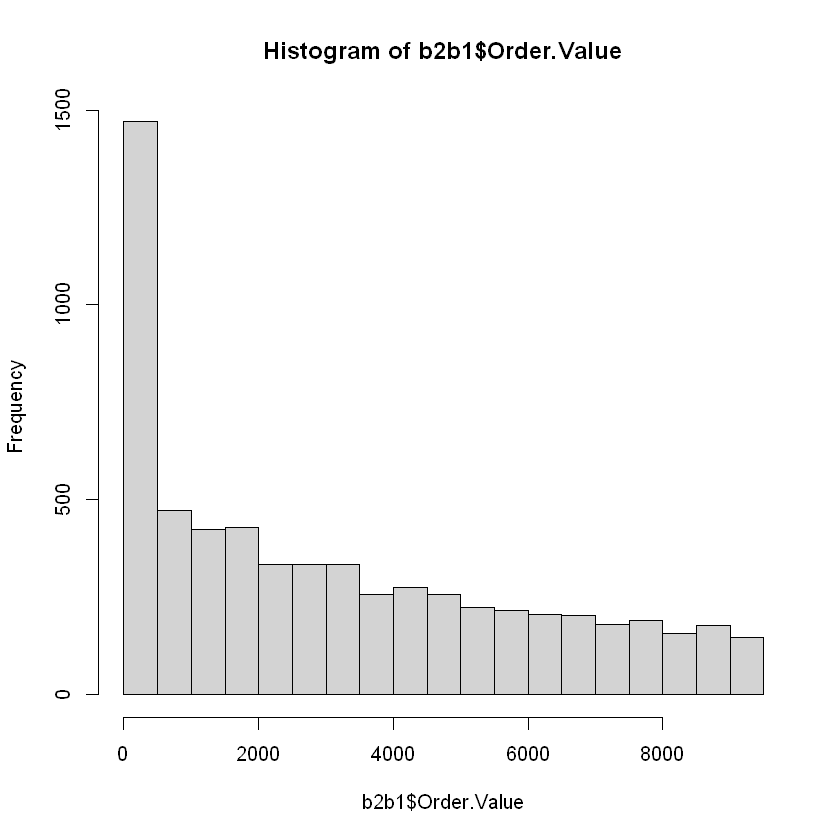

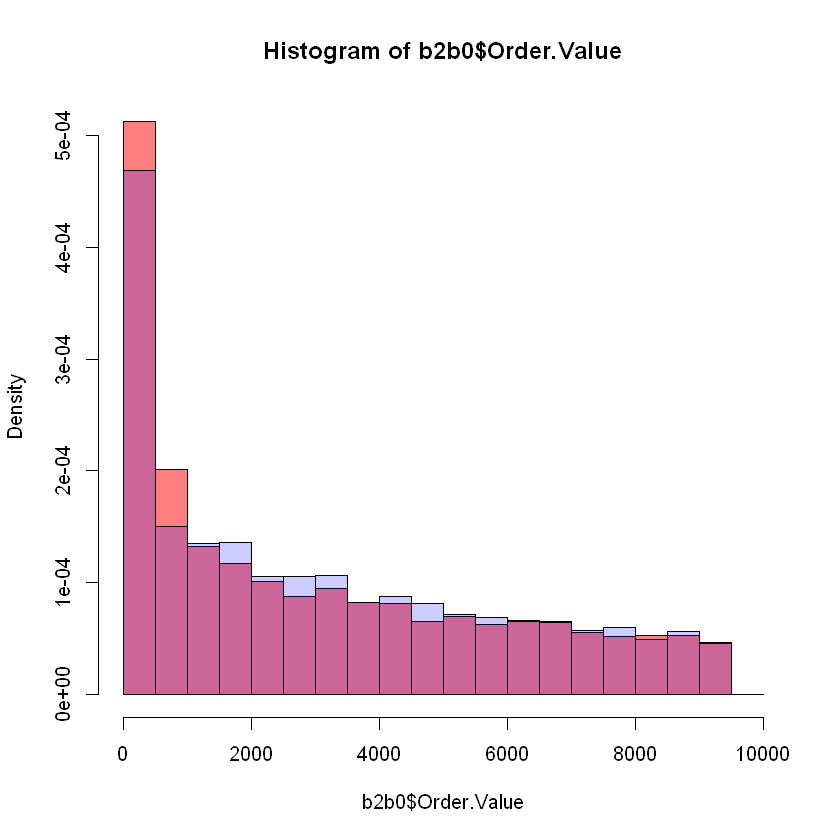

In [32]:
#Realizamos hisotgramas de los precios de compra separado por el sistema de recomendación
hist(b2b0$Order.Value)
hist(b2b1$Order.Value)
hist(b2b0$Order.Value, col=rgb(1,0,0,0.5), breaks=seq(0,10000,500), probability=T,)
hist(b2b1$Order.Value, add=T, col=rgb(0,0,1,0.2), breaks=seq(0,10000,500), probability=T)

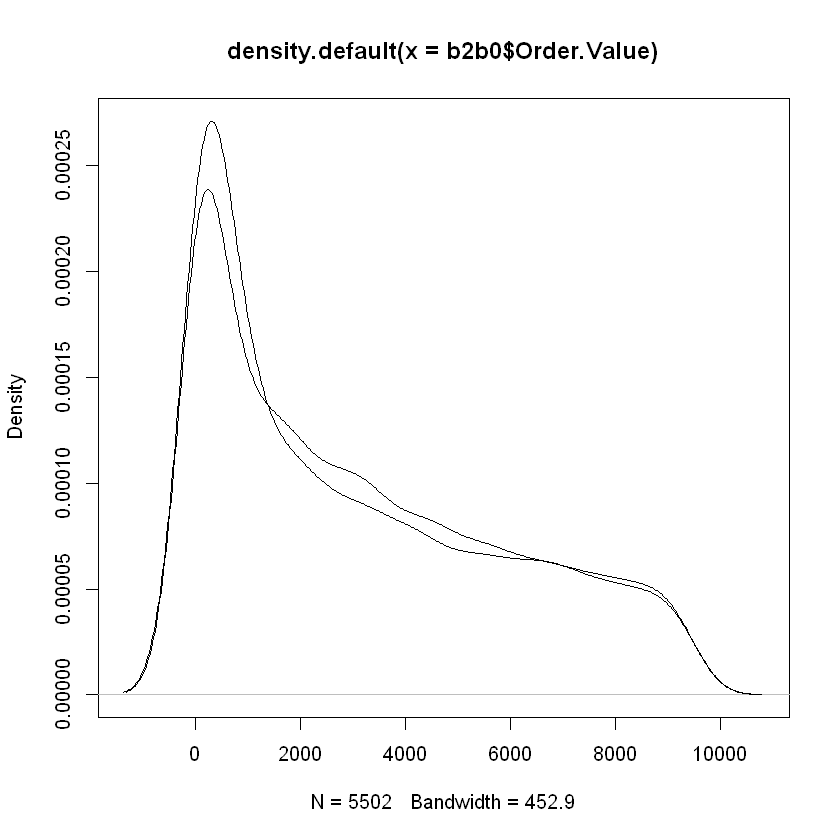

In [34]:
#Realizamos un gráfico de densidad con lineas para ver más claro la diferéncia entre el sistema de ventas y sin
plot(density(b2b0$Order.Value))
lines(density(b2b1$Order.Value), )

In [39]:
#Estadisticos para demostrar si las hipotesis son diferentes
n_0<-sum(b2b$Group==0)
n_1<-sum(b2b$Group==1)
n_0
n_1
n_total=n_0+n_1
n_total #Vemos que concuerda con el total de datos del tail de la tabla que se mostraba más arriba


[1] 5502

[1] 6284

[1] 11786

In [42]:
mean0=mean(b2b0$Order.Value)
mean0
mean1=mean(b2b1$Order.Value)
mean1
sd0=sd(b2b0$Order.Value)
sd0
sd1=sd(b2b1$Order.Value)
sd1

sd0*sd0/n_0

[1] 3024.787

[1] 3173.837

[1] 2817.731

[1] 2795.303

[1] 1443.04

In [53]:
#Calculo Z
delta_mu=mean1-mean0
sddelta_mu=sqrt((sd0*sd0)/n_0+(sd1*sd1)/n_1)
delta_mu
sddelta_mu
z=delta_mu/sddelta_mu
z
pnorm(z)*100

[1] 149.0503

[1] 51.83118

[1] 2.875688

[1] 99.79843

Visualización y comprensión del dataset.

Teniendo en cuenta solo los dos histogramas respecto al valor de venta (Order.Value) iniciales, podemos observar una distribución muy parecida. Casi puedes llegar a pensar que son bastante iguales las muestras con el sistema de ventas de las que no se aplica el sistema. Pero cuando superponemos los dos histogramas observamos como los valores con un sistema de ventas tienden a ser un poco más elevados que los que no tienen el sistema de ventas (Esto primeramente puede ser debido a que hay más muestras con el sistema de ventas). Más claro se observa al representar el gráfico de líneas de densidad respecto al valor de venta (Order.Value). Podemos observar como en los dos casos los valores de venta de 0 a 2000 son la mayoría, tanto en los histogramas como en el gráfico de líneas, pero se observa un incremento bastante elevado a las muestras que presentan un sistema de ventas. Por lo tanto, podemos pensar intuitivamente que el sistema de ventas hace mejorar las ventas.

Discutir si tenemos la misma distribución de ventas.

Fijándonos en los histogramas podríamos llegar a pensar que al tener más valores con el sistema de ventas esto hace que los dos grupos de muestras sean prácticamente iguales. Pero si nos fijamos en las medias totales de valores de ventas (Oerder.value) podemos ver una clara diferencia. Observamos que con el sistema de ventas la media es 149,5 unidades más elevado que sin el sistema de ventas. También observando el primer y tercer quartil respecto a los valores que no se aplica el sistema de ventas observamos que son más bajos respecto a los que se aplica el sistema. Esto afirma en principio que con el sistema de ventas estas generando más beneficio que sin él.

Validar la hipótesis que la clase 1 tiene un valor de venta medio más alta (Hipotesis nula: el valor de venta de la clase 0 es igual al de la clase 1)

Como bien hemos especificado anteriormente parece ser que con el sistema de ventas se genera un beneficio mayor por producto, tal como muestra la media. Ahora bien, para poder asegurar que las dos muestras (la del sistema de ventas respecto a la que no utiliza el sistema de ventas) son diferentes y que una es más elevada que la otra, realizamos los cálculos estadísticos y con el resultado de "z" podemos llegar a verificar que las muestras de valor de ventas de las que se utiliza el sistema de ventas son (los valores) z veces el valor de la desviación estándar respecto la media de las que no se utiliza el sistema de ventas. Si nos fijamos en el porcentaje de encontrar un valor de “z” igual o menor observamos como el porcentaje es de 99,8%. Con este valor "z" podemo entender que es muy poco probable que las dos muestras (la de sistema de ventas y la que no se aplica el sistema de ventas) sean iguales. Por lo tanto, es poco probable que la hipótesis nula sea cierta. Podríamos decir con bastante fiabilidad que la hipótesis de que el sistema de ventas mejora el resultado es cierta. (Estos resultados son basándonos en el conjunto del total, no hemos aplicado ningún filtro que elimine los extremos, es decir, los resultados muy grandes o muy pequeños, ya que he considerado que hay una frecuencia muy alta en todos los valores de ventas para hacer algún tipo de sesgo).

Discusión de resultados y vías abiertas 

Basandome en los resultado obtenidos de este estudio analítico yo personalmente sí que recomendaría el uso del sistema de recomendación de ventas. Ya que se demuestra que es cierta la hipótesis de que aumenta el valor de venta si se aplica el sistema de recomendación y exactamente podemos asegurar de que aumentan las ventas por producto en 149.5 unidades, que en mi parecer no es poco. Para hacer un estudio más detallado siempre se puede aumentar el nivel de muestras pero esto depende del volumen de la empresa (hay una muestra de 5502 datos de ventas sin el sistema de recomendación y 6284 datos con el sistema de recomendación, a mi parecer es un número bastante aceptable para asegurar la hipótesis). No sabemos el tiempo que ha llevado tomar estos datos, ni como han sido obtenidos, en principio todos los datos para tener resultados más fiables deberían haber sido tomados bajo las mismas condiciones. Por lo tanto basandonos en solo los datos (media, quartiles, validación hipotesis valor "z"), se debería aplicar el sistema de recomendación. Finalmente para destacar la importancia del valor "z" en economia de empresa, si la evolució en ventas/ beneficio de una empresa esta alrededor de un valor "z" de 3 o más da a entender de que esta en una posición financiera muy sólida y que si esta por debajo de 1,8 que hay riesgo de quiebra. (Fuente: https://www.investopedia.com/terms/z/zscore.asp) 